# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANDotum.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

1) 변수의 비즈니스 의미

> 각 지역 판매액을 확인해서 안팔리는곳과 잘팔리는 곳의 차이를 판단, 잘 팔리는곳은 그대로하되 안팔리는곳에서 새로운 전략을 새워야한다.

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [7]:
sales = "Sales"

In [8]:
data[sales].isna().sum()

0

> Null값이 없으므로 조치할 필요가 없다.

4) 가변수화 필요 여부

> 숫자형 변수이므로 가변수화 할 필요가 없다.

5) 기초통계량(수치화)

In [9]:
data[sales].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 1.0, 'Sales violinplot')

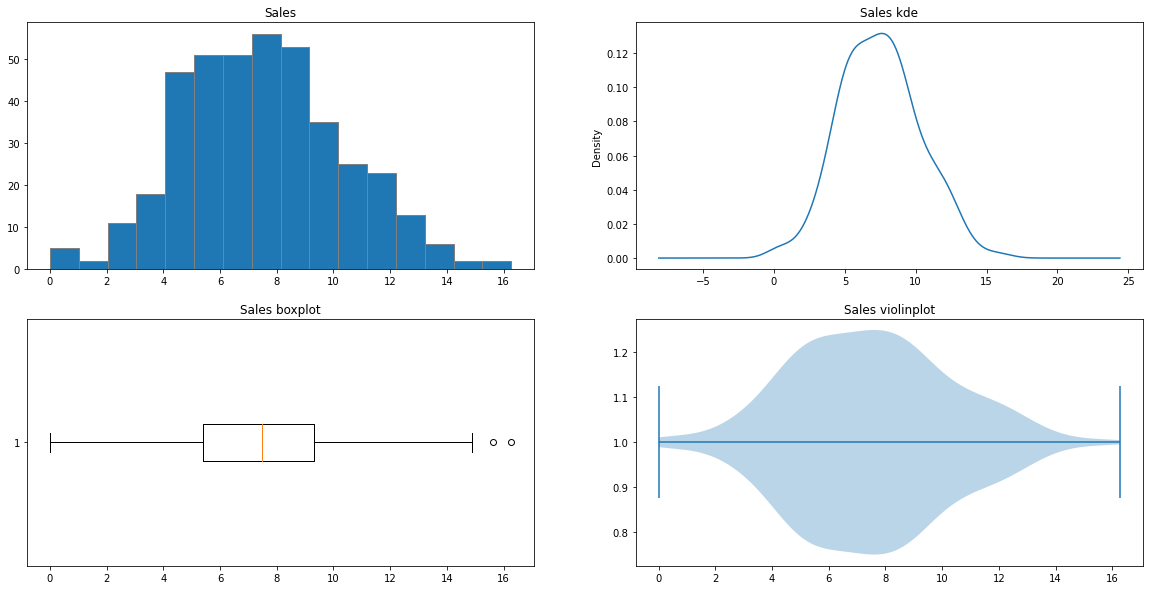

In [13]:
vis = data[sales]
vis_name = "Sales"
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(vis, bins=16, edgecolor = "grey")
plt.title(vis_name)

plt.subplot(2,2,2)
vis.plot(kind="kde")
plt.title(vis_name + " kde")

plt.subplot(2,2,3)
plt.boxplot(vis, vert = False)
plt.title(vis_name + " boxplot")

plt.subplot(2,2,4)
plt.violinplot(vis, vert = False)
plt.title(vis_name + " violinplot")

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 전체적으로 고르게 판매가 이루어져야하는데 주요 도시에 몰려있는것을 확인할 수 있다.<br>
> 아예안팔린곳과 적게 팔린 지역을 확인해보고 그 지역을 더 잘팔릴수 있도록 만들어야 할 것 같다.

8) 추가 분석해 볼 사항이 있나요?

> 적게 팔린 지역과 많이 팔린 지역의 이름을 확인해놓자.<br>
> 4원 이하 구간과 9원 이상구간을 기준으로 확인해보자.<br>
> 각 구간 별로 소득과 경쟁사 가격을 한번 비교해보자.

In [32]:
# 4 이하 판매된 지역
sales_down = data[data[sales]<=4]
sales_down

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
12,3.98,122,35,2,393,136,Medium,62,Yes,No
28,2.99,103,74,0,359,97,Bad,55,Yes,Yes
34,2.67,115,54,0,406,128,Medium,42,Yes,Yes
39,3.24,130,60,0,144,138,Bad,38,No,No
40,2.07,119,98,0,18,126,Bad,73,No,No
48,3.91,116,52,0,349,98,Bad,69,Yes,No
50,1.42,99,32,18,341,108,Bad,80,Yes,Yes
57,0.91,93,91,0,22,117,Bad,75,Yes,No
62,1.82,139,45,0,146,133,Bad,77,Yes,Yes
84,2.23,111,25,0,52,121,Bad,43,No,No


In [33]:
# 9 이상 판매된 지역
sales_up = data[data[sales]>=9]
sales_up

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
5,10.81,124,113,13,501,72,Bad,78,No,Yes
7,11.85,136,81,15,425,120,Good,67,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
380,9.64,106,64,10,17,89,Medium,68,Yes,Yes
383,9.35,98,117,0,76,68,Medium,63,Yes,No
384,12.85,123,37,15,348,112,Good,28,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,Yes,Yes


### 적게 팔린 지역과 많이 팔린 지역의 Income을 비교해보자

Text(0.5, 1.0, 'sales 4 down')

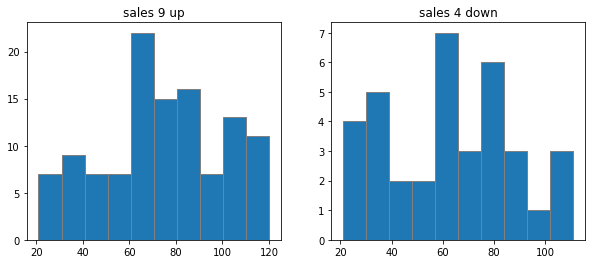

In [34]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(sales_up["Income"], bins= 10,edgecolor="grey")
plt.title("sales 9 up")

plt.subplot(1,2,2)
plt.hist(sales_down["Income"], bins= 10,edgecolor="grey")
plt.title("sales 4 down")

> 평균소득이 높은곳에서 많이 팔린것으로 보인다..<br>
> 하지만 평균소득이 높은데도 불구하고 적게 팔린곳이 있는것으로 보아 평균소득뿐만 아니라 다른곳도 확인이 필요해보인다.

### ② CompPrice

1) 변수의 비즈니스 의미

> 경쟁사와의 가격을 판단하여 우리제품의 경쟁력을 확인할 수 있다.

2) 숫자, 범주?

In [35]:
comp = "CompPrice"
data[comp]

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

> 숫자형이다.

3) NaN 존재 유무 및 조치방안

In [36]:
data[comp].isna().sum()

0

4) 가변수화 필요 여부

> 숫자형이므로 필요없다.

5) 기초통계량(수치화)

In [37]:
data[comp].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 1.0, 'Compare Price violinplot')

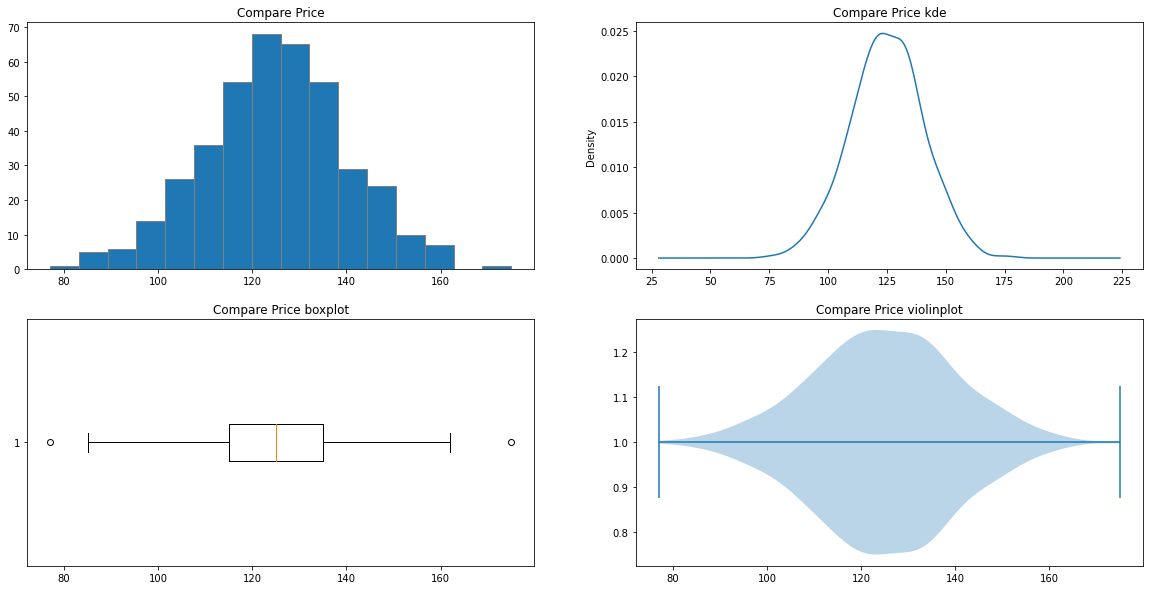

In [38]:
vis = data[comp]
vis_name = "Compare Price"
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(vis, bins=16, edgecolor = "grey")
plt.title(vis_name)

plt.subplot(2,2,2)
vis.plot(kind="kde")
plt.title(vis_name + " kde")

plt.subplot(2,2,3)
plt.boxplot(vis, vert = False)
plt.title(vis_name + " boxplot")

plt.subplot(2,2,4)
plt.violinplot(vis, vert = False)
plt.title(vis_name + " violinplot")

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 사실 경쟁사 가격만 보았을떄는 크게 의미가 없어보인다. 각 지역별로 얼마나 자사 지역별 판매가격과 비교해보는것이 필요해보인다.

8) 추가 분석해 볼 사항이 있나요?

### 자사 지역별 판매가격과 경쟁사가격의 비교

In [45]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,No,Yes
397,7.41,162,26,12,368,159,Medium,40,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,Yes,Yes


* 데이터 별 구분지어줄 수 있는 primary key가 없기때문에 index를 변수로 사용

In [47]:
data_comp = data.reset_index()

In [49]:
data_comp.sort_values("Sales")

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
174,174,0.00,139,24,0,358,185,Medium,79,No,No
106,106,0.16,102,33,0,217,139,Medium,70,No,No
165,165,0.37,147,58,7,100,191,Bad,27,Yes,Yes
143,143,0.53,122,88,7,36,159,Bad,28,Yes,Yes
57,57,0.91,93,91,0,22,117,Bad,75,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
18,18,13.91,110,110,0,408,68,Good,46,No,Yes
367,367,14.37,95,106,0,256,53,Good,52,Yes,No
25,25,14.90,139,32,0,176,82,Good,54,No,No
316,316,15.63,122,36,5,369,72,Good,35,Yes,Yes


* 여기서 어떻게 비교를 해야할 지 모르겠습니다...

### ③ Income

1) 변수의 비즈니스 의미

> 각 지역별 평균 소득을 의미합니다.

2) 숫자, 범주?

> 숫자입니다.

3) NaN 존재 유무 및 조치방안

In [50]:
income = "Income"
data[income].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없다.

5) 기초통계량(수치화)

In [52]:
data[income].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 1.0, 'Income violinplot')

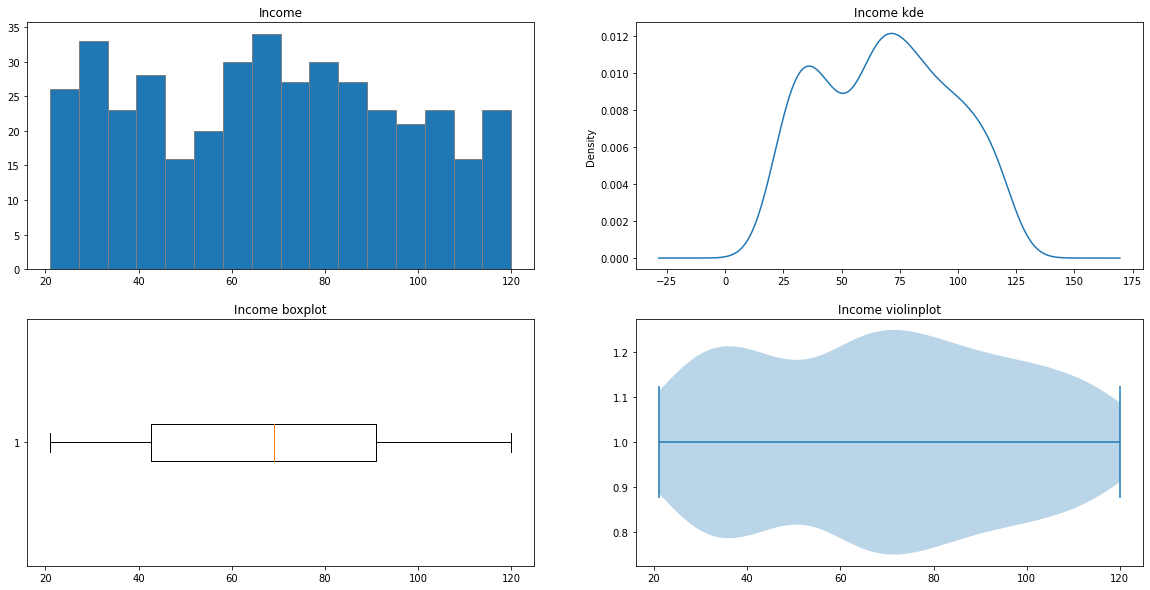

In [53]:
vis = data[income]
vis_name = "Income"
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(vis, bins=16, edgecolor = "grey")
plt.title(vis_name)

plt.subplot(2,2,2)
vis.plot(kind="kde")
plt.title(vis_name + " kde")

plt.subplot(2,2,3)
plt.boxplot(vis, vert = False)
plt.title(vis_name + " boxplot")

plt.subplot(2,2,4)
plt.violinplot(vis, vert = False)
plt.title(vis_name + " violinplot")

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 밀도적으로 보았을 때 40 ~ 80의 평균 소득을 가지고 있지만 plot으로 보았을 때 전체적으로 비슷한 수입을 보여주는것으로 보인다.

### ④ Advertising

1) 변수의 비즈니스 의미

> 각 지역 회사의 광고 예산을 확인 할 수 있다.

2) 숫자, 범주?

In [54]:
adv = "Advertising"

data[adv]

0      11
1      16
2      10
3       4
4       3
       ..
395    17
396     3
397    12
398     7
399     0
Name: Advertising, Length: 400, dtype: int64

> 숫자형이다


3) NaN 존재 유무 및 조치방안

In [55]:
data[adv].isna().sum()

0

4) 가변수화 필요 여부

> 필요없다.



5) 기초통계량(수치화)

In [57]:
data[adv].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 1.0, 'Advertising violinplot')

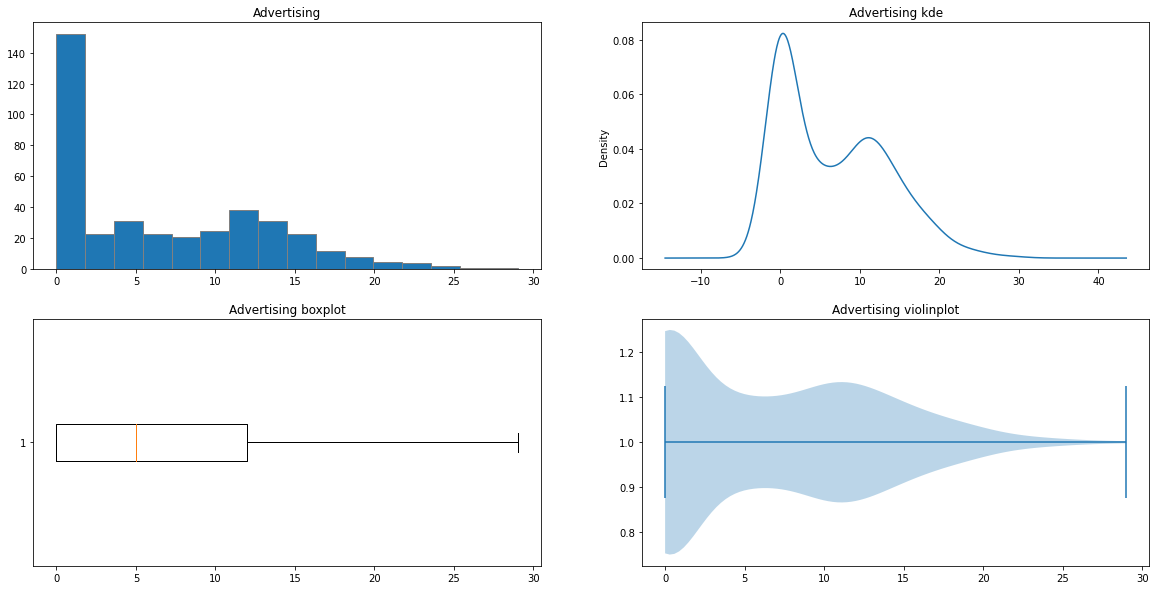

In [58]:
vis = data[adv]
vis_name = "Advertising"
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(vis, bins=16, edgecolor = "grey")
plt.title(vis_name)

plt.subplot(2,2,2)
vis.plot(kind="kde")
plt.title(vis_name + " kde")

plt.subplot(2,2,3)
plt.boxplot(vis, vert = False)
plt.title(vis_name + " boxplot")

plt.subplot(2,2,4)
plt.violinplot(vis, vert = False)
plt.title(vis_name + " violinplot")

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 광고 예산이 적은 곳들이 은근 많다.
- 없는곳과 있는곳과의 판매액이 달라지는지 확인을 해보고 싶다.
- 만약 의미가 유의미하게 나지 않는다면 광고에 잘못 돈을 쓰인다고 생각할 수 있다.

### ⑤ Population

1) 변수의 비즈니스 의미

> 지역 인구수

2) 숫자, 범주?

In [59]:
pop = "Population"
data[pop]

0      276
1      260
2      269
3      466
4      340
      ... 
395    203
396     37
397    368
398    284
399     27
Name: Population, Length: 400, dtype: int64

> 숫자형

3) NaN 존재 유무 및 조치방안

In [60]:
data[pop].isna().sum()

0

4) 가변수화 필요 여부

> 없다

5) 기초통계량(수치화)

In [61]:
data[pop].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 1.0, 'Population violinplot')

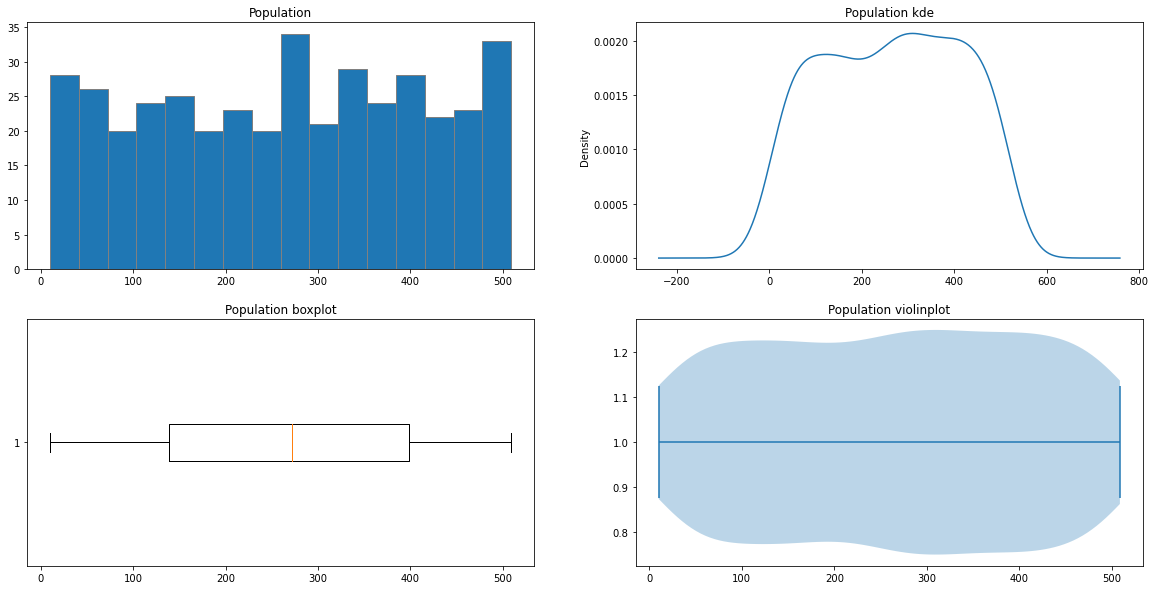

In [62]:
vis = data[pop]
vis_name = "Population"
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(vis, bins=16, edgecolor = "grey")
plt.title(vis_name)

plt.subplot(2,2,2)
vis.plot(kind="kde")
plt.title(vis_name + " kde")

plt.subplot(2,2,3)
plt.boxplot(vis, vert = False)
plt.title(vis_name + " boxplot")

plt.subplot(2,2,4)
plt.violinplot(vis, vert = False)
plt.title(vis_name + " violinplot")

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 인구값은 다들 비슷하다.

### ⑥ Price

> 자사 지역별 판매가격

1) 변수의 비즈니스 의미

In [63]:
price = "Price"
data[price]

0      120
1       83
2       80
3       97
4      128
      ... 
395    128
396    120
397    159
398     95
399    120
Name: Price, Length: 400, dtype: int64

2) 숫자, 범주?

> 숫자형

3) NaN 존재 유무 및 조치방안

In [64]:
data[price].isna().sum()

0

4) 가변수화 필요 여부

> 필요없다.

5) 기초통계량(수치화)

In [65]:
data[price].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

Text(0.5, 1.0, 'Price violinplot')

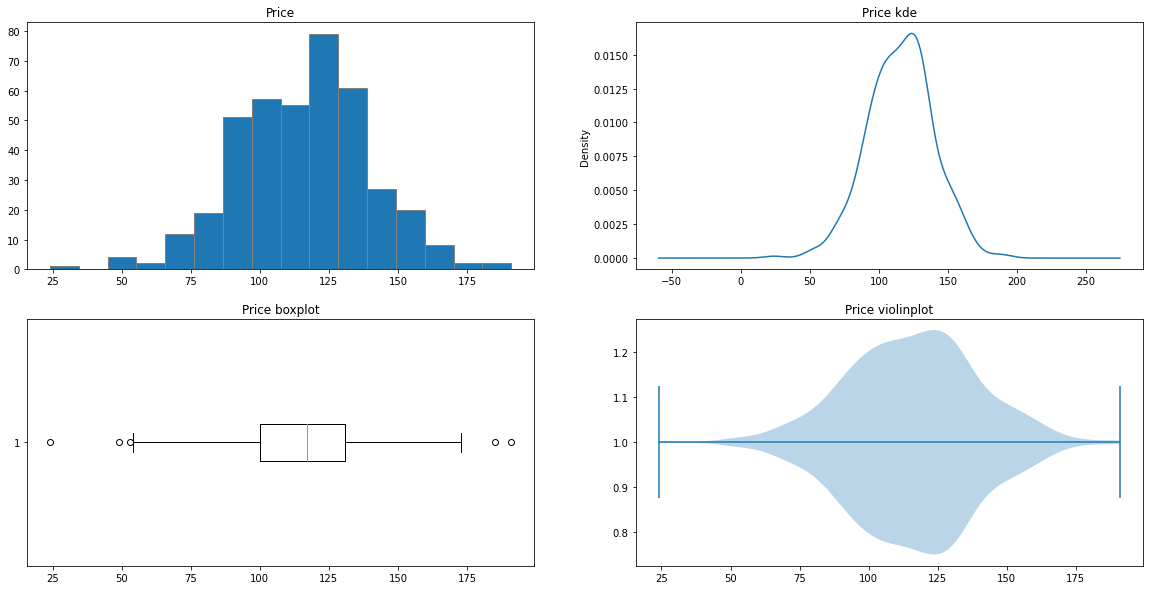

In [66]:
vis = data[price]
vis_name = "Price"
# 히스토그램, 밀도함수, 박스플롯, 바이올린 플롯

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.hist(vis, bins=16, edgecolor = "grey")
plt.title(vis_name)

plt.subplot(2,2,2)
vis.plot(kind="kde")
plt.title(vis_name + " kde")

plt.subplot(2,2,3)
plt.boxplot(vis, vert = False)
plt.title(vis_name + " boxplot")

plt.subplot(2,2,4)
plt.violinplot(vis, vert = False)
plt.title(vis_name + " violinplot")

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 판매가격이 너무 낮아도 많이 팔리지 않았다.

### ⑦ ShelveLoc

1) 변수의 비즈니스 의미

> 진열 상태를 볼 수 있다.

2) 숫자, 범주?

In [67]:
shelve = "ShelveLoc"
data[shelve]

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

> 범주형이다.



3) NaN 존재 유무 및 조치방안

In [70]:
data[shelve].isna().sum()

0

> 없다.

4) 가변수화 필요 여부

> 필요하다.

5) 기초통계량(수치화)

In [71]:
print(data[shelve].value_counts())
print(data[shelve].value_counts()/ len(data[shelve]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


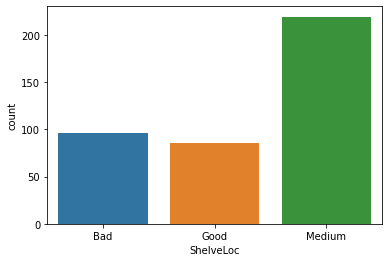

In [72]:
sns.countplot(data[shelve])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 진열 상태가 너무 좋아도 왜 많이 안팔리는것일까?

### ⑧ Age

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

In [73]:
age = "Age"
data[age]

0      42
1      65
2      59
3      55
4      38
       ..
395    33
396    55
397    40
398    50
399    49
Name: Age, Length: 400, dtype: int64

> 숫자형이다.

3) NaN 존재 유무 및 조치방안

In [74]:
data[age].isna().sum()

0

4) 가변수화 필요 여부

> 10대 20대로 나누면 좀 더 보기 편할 것 같다.

5) 기초통계량(수치화)

In [75]:
data[age].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5-1) 10대, 20대로 나누어보자
- 최소 25세부터 최대 80세까지 존재한다.

In [77]:
bin = [0,30, 40,50,60,70,np.inf]
labels = ["30세 미만", "30대" ,"40대", "50대", "60대", "70세 이상"]
data["연령"] = pd.cut(data[age], bins = bin, right=False, labels = labels)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,연령
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,40대
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,60대
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,50대
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,50대
4,4.15,141,64,3,340,128,Bad,38,Yes,No,30대
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,Yes,Yes,30대
396,6.14,139,23,3,37,120,Medium,55,No,Yes,50대
397,7.41,162,26,12,368,159,Medium,40,Yes,Yes,40대
398,5.94,100,79,7,284,95,Bad,50,Yes,Yes,50대


6) 분포 확인(시각화)

<AxesSubplot:xlabel='연령', ylabel='count'>

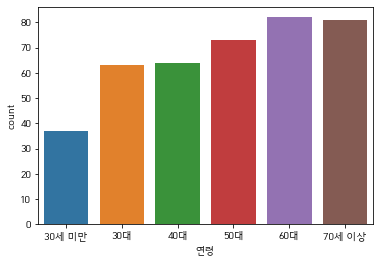

In [80]:
sns.countplot(data["연령"])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 대부분 30대 이상이라고 보면 되는것 같은데 은근 6 70대이상도 많은것을 확인할 수 있었다.

### ⑨ Urban

1) 변수의 비즈니스 의미

> 도심 지역인지 아닌지 0, 1로 구분해놓은 것

2) 숫자, 범주?

> 범주형이다.


3) NaN 존재 유무 및 조치방안

In [81]:
urban = "Urban"
data[urban].isna().sum()

0

4) 가변수화 필요 여부

> 이미 0, 1로되어있으므로 가변수화는 필요없다.

5) 기초통계량(수치화)

In [82]:
print(data[urban].value_counts())
print(data[urban].value_counts()/ len(data[urban]))

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

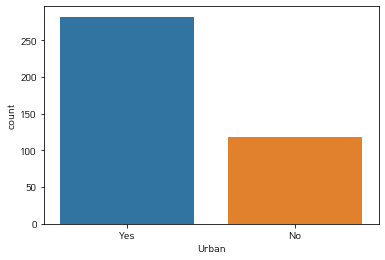

In [83]:
sns.countplot(data[urban])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 대부분 도심에 사는 분들이 많은 것을 확인할 수 있다.

### ⑩ US

1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 없는지 0, 1로 구분해놓은것

2) 숫자, 범주?

> 범주형이다.

3) NaN 존재 유무 및 조치방안

In [84]:
us = "US"
data[us].isna().sum()

0

4) 가변수화 필요 여부

> 필요없다.

5) 기초통계량(수치화)

In [85]:
print(data[us].value_counts())
print(data[us].value_counts()/ len(data[us]))

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


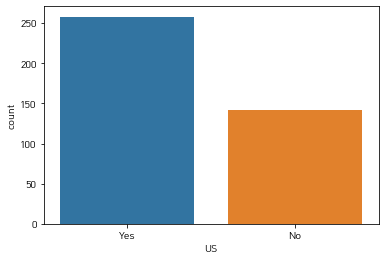

In [86]:
sns.countplot(data[us])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 미국내의 매장이 상당한것을 확인 할 수 있다.